# Modelo de Detecção de Fraude em Cartão de Crédito
Mateus de Sousa Martins

mateus.martins8605@gmail.com

In [1]:
#importando bibliotecas 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
credit = pd.read_csv('creditcard.csv') #importando o arquivo csv obtidono site da Kaggle para mais informações https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
credit.head() #visualizando as 5 primeiras linhas

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Conteúdo do DataFrame
* Time indica o tempo, em segundos, que se passou desde a primeira transação registrada;
* V1 a V28 passaram por uma transformação PCA para proteger os dados dos clientes, não é possível afirmar o que cada coluna significa;
* Amount significa o valor da transação;
* Class indica se houve ou não fraude, 0 se não houve, 1 caso contrário.

In [3]:
print(f'Temos {credit.shape[0]} amostra de dados.')
print(f'Existem {credit.shape[1]-1} variáveis') #-1 para excluir a coluna class, que não será uma variável e sim o alvo do modelo

Temos 284807 amostra de dados.
Existem 30 variáveis


In [4]:
# Porcentagem de dados que indicam fraude
print(f'A porcentagem de dados que indicam a ocorrência de fraude é de {credit["Class"].mean()*100:.2f}%')

A porcentagem de dados que indicam a ocorrência de fraude é de 0.17%


In [5]:
credit.Class.value_counts() # Existem 492 ocorrências de fraude

0    284315
1       492
Name: Class, dtype: int64

In [6]:
credit.info() #não há dados faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
credit.describe()
#Os dados não estão normalizados  

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
#Mudando a variável amount por uma discreta
disc = np.linspace(credit['Amount'].min(),credit['Amount'].max(),10)
disc[-1] = np.inf
disc[0] = -np.inf
credit['Amount_disc'] = pd.cut(credit['Amount'],bins= disc,labels=list(range(1,len(disc))))

In [9]:
credit.Amount_disc.value_counts()

1    284484
2       285
3        28
4         4
5         3
7         2
9         1
6         0
8         0
Name: Amount_disc, dtype: int64

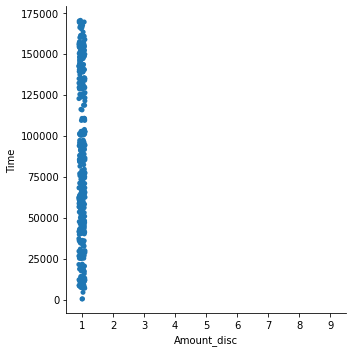

In [10]:
# Gráfico de dispersão da quantidade de dinheiro gasto discretizado e o tempo quando ocorreu fraude
credit_mod = credit[credit['Class']==1]
sns.catplot(data=credit_mod,x='Amount_disc',y='Time')
# não parece haver padrão no tempo para ocorrência de fraude

In [11]:
credit_mod.Amount_disc.value_counts()
# Todos os golpes ocorrem para pequenos valores, entre 0 e 2854

1    492
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
Name: Amount_disc, dtype: int64

In [12]:
#Separando em conjunto de treino e teste mantendo a proporção entre fraudes e não fraudes

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in split.split(credit,credit.Class):
    credit_train = credit.loc[train_index]
    credit_test = credit.loc[test_index]
    
Y_train = np.array(credit_train.Class)
X_train = credit_train.drop(columns=['Class','Time','Amount'])

Y_test = np.array(credit_test.Class)
X_test = credit_test.drop(columns=['Class','Time','Amount'])

In [13]:
#Normalizando os dados
from sklearn.preprocessing import StandardScaler
normal = StandardScaler()
X_train_trans = normal.fit_transform(X_train)
X_test_trans = normal.transform(X_test)

In [14]:
#Criando função para plotar matriz de confusão
def plot_matriz_conf(y, y_hat):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_hat)
    sns.heatmap(cm, annot=True)
    plt.ylabel('Rótulos verdadeiros')
    plt.xlabel('Rótulos previstos')
    plt.xticks([.5,1.5],['Não Houve fraude','houve fraude'], rotation=0)
    plt.yticks([0.5,1.5],['Não Houve fraude','houve fraude'],rotation=0)
    plt.title('Matriz de Confusão')

In [15]:
# Agora podemos treinar os modelos.

In [16]:
from sklearn.model_selection import GridSearchCV #para procurar os melhores hiperparâmetros

# Tree 

In [17]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()

In [18]:
params = {'max_depth':[2,4,6,8,10], 'criterion':['gini','entropy'],'splitter':['best','random']}
tree_grid = GridSearchCV(tree_clf,params,verbose=1,cv=5)
tree_grid.fit(X_train_trans, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'splitter': ['best', 'random']},
             verbose=1)

In [19]:
print(f'Os melhores parâmetros foram {tree_grid.best_params_}')
print(f'accuracy: {tree_grid.best_score_*100:.2f}%')

Os melhores parâmetros foram {'criterion': 'gini', 'max_depth': 6, 'splitter': 'best'}
accuracy: 99.95%


In [20]:
from sklearn.metrics import accuracy_score

In [21]:
y_hat = tree_grid.predict(X_test_trans)
print(f'A accuracy no conjunto de teste é de {accuracy_score(Y_test, y_hat)*100:.2f}%')

A accuracy no conjunto de teste é de 99.94%


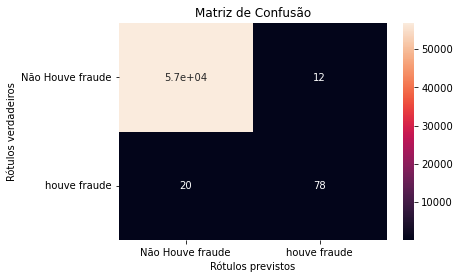

In [22]:
# A matriz de confusão é 
plot_matriz_conf(Y_test, y_hat)

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()

In [24]:
log_clf.fit(X_train_trans,Y_train)

LogisticRegression()

In [25]:
y_hat = log_clf.predict(X_test_trans)
print(f'A accuracy no conjunto de teste é de {accuracy_score(Y_test, y_hat)*100:.2f}%')

A accuracy no conjunto de teste é de 99.92%


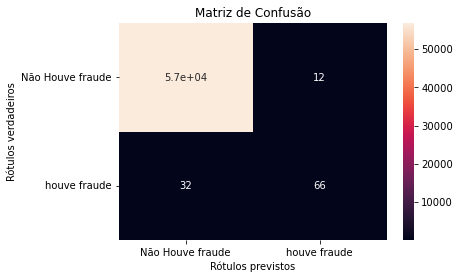

In [26]:
plot_matriz_conf(Y_test, y_hat)

# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn_clf = KNeighborsClassifier()
params = {'n_neighbors': [ 4, 5, 6, 7, 8]}

In [29]:
knn_grid = GridSearchCV(knn_clf, params, verbose=1, cv=3)
knn_grid.fit(X_train_trans, Y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [4, 5, 6, 7, 8]}, verbose=1)

In [30]:
print(f'Os melhores parâmetros foram {knn_grid.best_params_}')
print(f'accuracy: {knn_grid.best_score_*100:.2f}%')

Os melhores parâmetros foram {'n_neighbors': 4}
accuracy: 99.95%


In [31]:
y_hat = knn_grid.predict(X_test_trans)
print(f'A accuracy no conjunto de teste é de {accuracy_score(Y_test, y_hat)*100:.2f}%')

A accuracy no conjunto de teste é de 99.96%


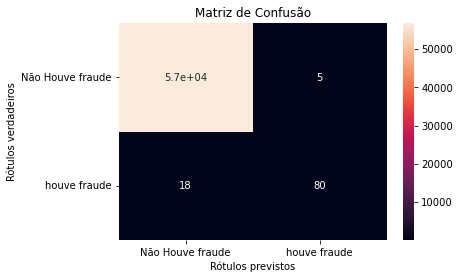

In [32]:
plot_matriz_conf(Y_test, y_hat)

# ANN

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
X_train_trans.shape

(227845, 29)

In [59]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten()) # modifica o array para 1D
model.add(keras.layers.Dense(300, activation="relu")) # 300 neurônios
model.add(keras.layers.Dense(100, activation='relu')) # 100 neurônios
model.add(keras.layers.Dense(2,activation='softmax')) #10 outputs possíveis, softmax para a soma das probabilidades ser 1.

In [62]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [63]:
history = model.fit(X_train_trans, Y_train, epochs =100, validation_data = (X_test_trans,Y_test))

Epoch 1/100
7121/7121 [==============================] - 32s 4ms/step - loss: 0.0125 - accuracy: 0.9984 - val_loss: 0.0040 - val_accuracy: 0.9992
Epoch 2/100
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0031 - val_accuracy: 0.9995
Epoch 3/100
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0029 - val_accuracy: 0.9995
Epoch 4/100
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 5/100
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0028 - val_accuracy: 0.9995
Epoch 6/100
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0026 - val_accuracy: 0.9996
Epoch 7/100
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0026 -

In [64]:
y_hat = model.predict(X_test_trans)
y_hat

1781/1781 [==============================] - 4s 2ms/step


array([[9.9997115e-01, 2.8832555e-05],
       [9.9999487e-01, 5.1595016e-06],
       [9.9999988e-01, 1.4309964e-07],
       ...,
       [9.9990034e-01, 9.9627177e-05],
       [9.9999952e-01, 4.8616545e-07],
       [9.9998212e-01, 1.7901353e-05]], dtype=float32)

In [65]:
y_hat = np.argmax(y_hat, axis = -1)
y_hat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
accuracy_score(Y_test, y_hat)

0.9996137776061234

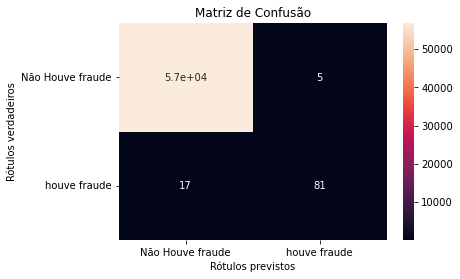

In [67]:
plot_matriz_conf(Y_test, y_hat)

Vamos tentar melhorar o resultado quando houve fraude

# Conclusão

Todos os modelos treinado estão próximos de atingir 100% de acerto na identificação de fraude. Isso ocorre porque é muito simples detectar quando não houve fraude, nos descobrimos anteriormente que amount_disc > 1 indicava fortemente a ausência de fraude, concerteza os modelos percebera isso. Os modelos pecam na hora de detectar quando ocorre a fraude, esse seria o erro que traria mais prejuízo.
* A DecisionTreeClassifier obteve um acerto de 79,59% no acerto de houve fraude 
* A Regressão Logística obteve um acerto de 67,34% no acerto de houve fraude 
* O KNeighborsClassifier obteve um acerto de 81,63% no acerto de houve fraude
* A Rede neural obteve um acerto de 82,65% no acerto de houve fraude

Uma solução seria modificar a Loss dos modelos para penalizá-los mais quando erram o rótulo de houve fraude o colocando como não houve fraude.

A Rede Neural foi o modelo que performou melhor.